# Skin Lesion Segmentation

The topic of this training is the segmentation of Skin lesion using Deep Learning using Tensorflow. Deep learning is a class of machine learning algorithms that uses multiple layers to progressively extract higher level features from the raw input. For example, in image processing, lower layers may identify edges, while higher layers may identify the concepts relevant to a human such as digits or letters or faces.

Deep Learning Basics : https://towardsdatascience.com/intro-to-deep-learning-c025efd92535

Tensorflow Documentation : https://www.tensorflow.org/

Skin Lesion Dataset : https://challenge.kitware.com/#phase/5841916ccad3a51cc66c8db0

### Importing the Libraries

Let's start. First, we import all relevant modules. Please execute the following cell.

In [1]:
import cv2 as cv
import SimpleITK as sitk

import tensorflow as tf

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Concatenate, UpSampling2D, Input
from tensorflow.keras.models import Model

import os 

#cv2 (opencv library) and simpleitk to reading images
#tensorflow for building the Neural-Net model
#numpy for mathematical calculations
#pandas for reading csv files
#matplotlib for plotting images 
#os to read files in a directory

### Importing the Data

Add the path locations of train and test set to variables below and chceck the number of images in each folder.

Here we import the data that we have downloaded into our python notebook.

Please change the 'paths' according to the location of the downloaded data in the hard disk. We will be using the Training and test images for training our Neural network, and later test how the network performs using the Validation set.

In [2]:
image_path = 'H:/Arjun Files/Project/ISIC-2017_Training_Data/'    #defining the training image path
train = os.listdir(image_path)
len(train)   

2000

In [3]:
ground_path = 'H:/Arjun Files/Project/ISIC-2017_Training_Part1_GroundTruth/'  #defining the training ground truth path
train_gt = os.listdir(ground_path)
len(train_gt)

2000

In [4]:
test_path = 'H:/Arjun Files/Project/ISIC-2017_Test_v2_Data'     #defining the test image path
test= os.listdir(test_path)
len(test)

600

In [5]:
test_ground_path='H:/Arjun Files/Project/ISIC-2017_Test_v2_Part1_GroundTruth'    #defining the test ground truth images
test_gt = os.listdir(test_ground_path)
len(test_gt)

600

In [6]:
val_path = 'H:/Arjun Files/Project/ISIC-2017_Validation_Data'     #defining the validation image path
val= os.listdir(val_path)
len(val)

150

In [7]:
val_path_gt = 'H:/Arjun Files/Project/ISIC-2017_Validation_Part1_GroundTruth'     #defining the validation image path
val_gt= os.listdir(val_path_gt)
len(val_gt)

150

We find out that the training set has 2000 images and the test set 600 images and validation set has 150 images. The number of images are not a lot to successfully train a neural network (We do data augmentation later to increase the number of images). In supervised deep learning - the more the data the better the neural network will learn

### Visualizing the images

Execute the cells below to view the original image and the segmented image.

Here we use two ways to visualize images. First using SITK, and the second using OpenCV.

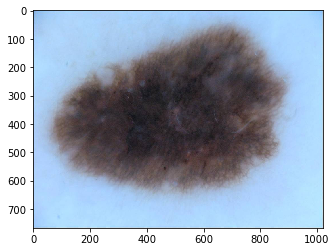

In [8]:
image_array=sitk.ReadImage(os.path.join(image_path,train[0]))           #reads the image
plt.imshow(sitk.GetArrayFromImage(image_array))                         #gets the array from that image
plt.show()

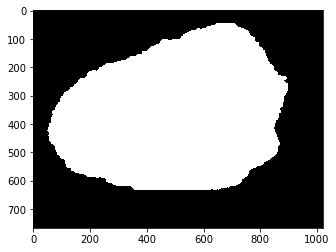

In [9]:
image_array2=cv.imread(os.path.join(ground_path,train_gt[0]))       #conversion to array in one step
plt.imshow(image_array2)
plt.show()

We saw that by using the opencv library when used to load images, changes the colourmap of the image. 

Try loading the first image (colour image) above using opencv instead of simpleitk and see for yourself.

So later on we use simpleitk to load the colour images and opencv to load the grayscale (segmented)images.

### Preprocessing the images

Here we have variable size images. But, Deeplearning models need all images to be of same size. So we first resize all images to size 512 * 512 , and then we save all the resized images to new folders. these steps will require some time to run.

Preprocessing is important as the neural network expects images of same sizes. Also training a neural network on larger images takes more time, so ideally image size is reduced to 512 * 512, or 256 * 256.

In [10]:
#making the directories
#please change path names according to where you want to save the files

if not os.path.exists('H:/Arjun Files/Project/Lesion'):
    try:
        os.mkdir('H:/Arjun Files/Project/Lesion/')
        os.mkdir('H:/Arjun Files/Project/Lesion/Train')
        os.mkdir('H:/Arjun Files/Project/Lesion/Train_gt')
        os.mkdir('H:/Arjun Files/Project/Lesion/Test')
        os.mkdir('H:/Arjun Files/Project/Lesion/Test_gt')
        os.mkdir('H:/Arjun Files/Project/Lesion/Val')
        os.mkdir('H:/Arjun Files/Project/Lesion/Val_gt')
    except OSError:
        print ("Creation of the directory %s failed")
    else:
        print ("Successfully created the directory %s ")

In [11]:
img_size = 512              #we will use 512 * 512 images from next steps

In [12]:
from skimage import io

# Create a blank array to store all the resized training images
# cv.resize to resize all the images to a particular size
# io.imsave to save the new images in a seperate folder to be accessed easily and faster
# append to join all the new images to the blank array

training_data=[]

def create_training_data():
    
    for images in train:     
        
        img=sitk.ReadImage(os.path.join(image_path,images))
        img_array=sitk.GetArrayFromImage(img)
        new_array=cv.resize(img_array,(img_size,img_size))
        
        io.imsave('H:/Arjun Files/Project/Lesion/Train/' + images[:-4] + '.png', new_array) #change path location

        training_data.append([new_array])

In [13]:
create_training_data()              #this cell will take time to execute as it converts and saves all the images

In [13]:
ground_truth_data=[]

def create_ground_truth_data():
    
    for images in train_gt:
        
        img = sitk.ReadImage(os.path.join(ground_path,images))
        img_array1= sitk.GetArrayFromImage(img)
        new_array1=cv.resize(img_array1,(img_size,img_size))
        
        io.imsave('H:/Arjun Files/Project/Lesion/Train_gt/' + images[:-4] + '.png', new_array1) #change path location
        
        ground_truth_data.append([new_array1])

In [15]:
create_ground_truth_data()         #this cell will take time to execute as it converts and saves all the images

C:\Users\arjun\Anaconda3\envs\tensorflowcpu\lib\site-packages\ipykernel_launcher.py:11: UserWarning: H:/Arjun Files/Project/Lesion/Train_gt/ISIC_0012179_segmentation.png is a low contrast image
  # This is added back by InteractiveShellApp.init_path()
C:\Users\arjun\Anaconda3\envs\tensorflowcpu\lib\site-packages\ipykernel_launcher.py:11: UserWarning: H:/Arjun Files/Project/Lesion/Train_gt/ISIC_0012376_segmentation.png is a low contrast image
  # This is added back by InteractiveShellApp.init_path()
C:\Users\arjun\Anaconda3\envs\tensorflowcpu\lib\site-packages\ipykernel_launcher.py:11: UserWarning: H:/Arjun Files/Project/Lesion/Train_gt/ISIC_0012406_segmentation.png is a low contrast image
  # This is added back by InteractiveShellApp.init_path()
C:\Users\arjun\Anaconda3\envs\tensorflowcpu\lib\site-packages\ipykernel_launcher.py:11: UserWarning: H:/Arjun Files/Project/Lesion/Train_gt/ISIC_0012481_segmentation.png is a low contrast image
  # This is added back by InteractiveShellApp.init

In [14]:
test_data=[]

def create_test_data():
    
    for images in test:
      
        img = sitk.ReadImage(os.path.join(test_path,images))
        img_array2 = sitk.GetArrayFromImage(img)
        new_array2=cv.resize(img_array2,(img_size,img_size))
        
        io.imsave('H:/Arjun Files/Project/Lesion/Test/' + images[:-4] + '.png', new_array2) #change path location

        training_data.append([new_array2])

In [17]:
create_test_data()         #this cell will take time to execute as it converts and saves all the images

In [15]:
test_GT_data=[]

def create_test_GT_data():
    
    for images in test_gt:
      
        img = sitk.ReadImage(os.path.join(test_ground_path,images))
        img_array3 = sitk.GetArrayFromImage(img)
        new_array3= cv.resize(img_array3,(img_size,img_size))
        
        io.imsave('H:/Arjun Files/Project/Lesion/Test_gt/' + images[:-4] + '.png', new_array3) #change path location

        training_data.append([new_array3])

In [38]:
create_test_GT_data()             #this cell will take time to execute as it converts and saves all the images

C:\Users\arjun\Anaconda3\envs\tensorflowcpu\lib\site-packages\ipykernel_launcher.py:11: UserWarning: H:/Arjun Files/Project/Lesion/Test_gt/ISIC_0013738_segmentation.png is a low contrast image
  # This is added back by InteractiveShellApp.init_path()
C:\Users\arjun\Anaconda3\envs\tensorflowcpu\lib\site-packages\ipykernel_launcher.py:11: UserWarning: H:/Arjun Files/Project/Lesion/Test_gt/ISIC_0014588_segmentation.png is a low contrast image
  # This is added back by InteractiveShellApp.init_path()
C:\Users\arjun\Anaconda3\envs\tensorflowcpu\lib\site-packages\ipykernel_launcher.py:11: UserWarning: H:/Arjun Files/Project/Lesion/Test_gt/ISIC_0015251_segmentation.png is a low contrast image
  # This is added back by InteractiveShellApp.init_path()
C:\Users\arjun\Anaconda3\envs\tensorflowcpu\lib\site-packages\ipykernel_launcher.py:11: UserWarning: H:/Arjun Files/Project/Lesion/Test_gt/ISIC_0015951_segmentation.png is a low contrast image
  # This is added back by InteractiveShellApp.init_pat

In [16]:
val_data=[]

def create_val_data():
    
    for images in val:
      
        img = sitk.ReadImage(os.path.join(val_path,images))
        img_array2 = sitk.GetArrayFromImage(img)
        new_array2=cv.resize(img_array2,(img_size,img_size))
        
        io.imsave('H:/Arjun Files/Project/Lesion/Val/' + images[:-4] + '.png', new_array2) #change path location

        training_data.append([new_array2])

In [46]:
create_val_data()               #this cell will take time to execute as it converts and saves all the images

In [17]:
val_GT_data=[]

def create_val_GT_data():
    
    for images in val_gt:
      
        img = sitk.ReadImage(os.path.join(val_path_gt,images))
        img_array3 = sitk.GetArrayFromImage(img)
        new_array3= cv.resize(img_array3,(img_size,img_size))
        
        io.imsave('H:/Arjun Files/Project/Lesion/Val_gt/' + images[:-4] + '.png', new_array3) #change path location

        training_data.append([new_array3])

In [48]:
create_val_GT_data()              #this cell will take time to execute as it converts and saves all the images

C:\Users\arjun\Anaconda3\envs\tensorflowcpu\lib\site-packages\ipykernel_launcher.py:11: UserWarning: H:/Arjun Files/Project/Lesion/Val_gt/ISIC_0012965_segmentation.png is a low contrast image
  # This is added back by InteractiveShellApp.init_path()
C:\Users\arjun\Anaconda3\envs\tensorflowcpu\lib\site-packages\ipykernel_launcher.py:11: UserWarning: H:/Arjun Files/Project/Lesion/Val_gt/ISIC_0013527_segmentation.png is a low contrast image
  # This is added back by InteractiveShellApp.init_path()
C:\Users\arjun\Anaconda3\envs\tensorflowcpu\lib\site-packages\ipykernel_launcher.py:11: UserWarning: H:/Arjun Files/Project/Lesion/Val_gt/ISIC_0013863_segmentation.png is a low contrast image
  # This is added back by InteractiveShellApp.init_path()


Now all the images are processed and saved in different directories to be used for furthur building the model

### Data Generation and Normalization

Now we need to load the images and masks together to be stored in train and test sets.

Please execute the cells below to do so.

In [18]:
def loadDataTrain(df1, path1, path2):
    
    X1, y1 = [], []
    
    for i, item in df1.iterrows():
        
        img1 = sitk.ReadImage(path1 + item[0]+'.png')
        img = sitk.GetArrayFromImage(img1)/255.0               #image normalization
        
        mask = cv.imread(path2 + item[0]+'_segmentation.png')/255.0
            
        X1.append(img)                                         #appends the images
        y1.append(mask)                                        #appends the masks
            
    X1 = np.array(X1)
    y1 = np.array(y1)
    
    return X1,y1

In [19]:
def loadDataTest(df2, path3, path4):
    
    X2, y2 = [], []
    for i, item in df2.iterrows():
        
        img1 = sitk.ReadImage(path3 + item[0]+'.png')
        img = sitk.GetArrayFromImage(img1)/255.0
        
        mask = cv.imread(path4 + item[0]+'_segmentation.png')/255.0

        X2.append(img)
        y2.append(mask)
               
    X2 = np.array(X2)
    y2 = np.array(y2)
    
    return X2,y2

### Loading the csv files using Pandas

Now we load df1 and df2, that are the excel files which contain the names of all files that are present in the train and test set as ISIC-2017_Training_Data_metadata.csv and ISIC-2017_Test_v2_Data_metadata.csv, respectively.

In [20]:
df1 = pd.read_csv('H:/Arjun Files/Project/ISIC-2017_Training_Data_metadata.csv')      #pandas to read the csv files
df1.head()

,image_id,age_approximate,sex
0,ISIC_0000000,55,female
1,ISIC_0000001,30,female
2,ISIC_0000002,60,female
3,ISIC_0000003,30,male
4,ISIC_0000004,80,male


In [21]:
df1 = df1.sample(frac=1, random_state=23)

In [22]:
df2= pd.read_csv('H:/Arjun Files/Project/ISIC-2017_Test_v2_Data_metadata.csv')
df2.head()

,image_id,age_approximate,sex
0,ISIC_0012086,30,male
1,ISIC_0012092,40,male
2,ISIC_0012095,25,male
3,ISIC_0012134,75,female
4,ISIC_0012136,70,male


In [23]:
df2 = df2.sample(frac=1, random_state=23)

Next we save the new path location of our preprocessed images in seperate variables.

In [24]:
path1 = 'H:/Arjun Files/Project/Lesion/Train/'
path2 = 'H:/Arjun Files/Project/Lesion/Train_gt/'

path3 = 'H:/Arjun Files/Project/Lesion/Test/'
path4 = 'H:/Arjun Files/Project/Lesion/Test_gt/'

### Creating X train/test and Y train/test data

Next we store the new images in X train/test and Y train/test variables.

Execeute the cell below, it will take some time to execute.

In [25]:
X_train, y_train = loadDataTrain(df1, path1, path2)
X_test, y_test = loadDataTest(df2, path3, path4)

In [26]:
X_train.shape

(2000, 512, 512, 3)

In [27]:
y_train.shape

(2000, 512, 512, 3)

In [28]:
X_test.shape

(600, 512, 512, 3)

In [29]:
y_test.shape

(600, 512, 512, 3)

We see that all the images have now been resized to shape 512 * 512 with 3 channels.

### Visualizing Data after Processing

We can now see the image and the ground truth together of our new images. We use the module random, which randomly pulls out any image from the dataset and then we plot the images using matplotlib.

In [30]:
import random

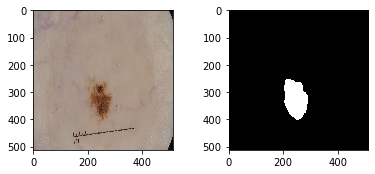

In [31]:
#Running this row each time will give some random result

r = random.randint(0, len(X_train)-1)

fig = plt.figure()
fig.subplots_adjust(hspace=0.4, wspace=0.4)
ax = fig.add_subplot(1, 2, 1)
ax.imshow(X_train[r])
ax = fig.add_subplot(1, 2, 2)
ax.imshow(y_train[r])

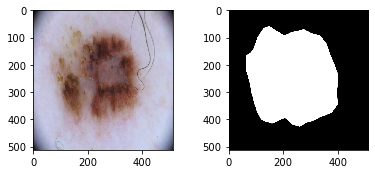

In [32]:
#Running this row each time will give some random result

r = random.randint(0, len(X_train)-1)

fig = plt.figure()
fig.subplots_adjust(hspace=0.4, wspace=0.4)
ax = fig.add_subplot(1, 2, 1)
ax.imshow(X_train[r])
ax = fig.add_subplot(1, 2, 2)
ax.imshow(y_train[r])

### Convolution Blocks

Finally we start building our neural network.

Here we use a special kind of Convolutional Neural Network (CNN) which is known as a U-Net. U-Net is one of the best network for biomedical image segmentation.

For details on U-Net please visit this link - https://lmb.informatik.uni-freiburg.de/people/ronneber/u-net/

From wikipedia - U-Net is a convolutional neural network that was developed for biomedical image segmentation at the Computer Science Department of the University of Freiburg, Germany. The network is based on the fully convolutional network and its architecture was modified and extended to work with fewer training images and to yield more precise segmentations. Segmentation of a 512×512 image takes less than a second on a modern GPU.

In [33]:
def down_block(x, filters, kernel_size=(3, 3), padding="same", strides=1):
    c = Conv2D(filters, kernel_size, padding=padding, strides=strides, activation="relu")(x)
    c = Conv2D(filters, kernel_size, padding=padding, strides=strides, activation="relu")(c)
    p = MaxPool2D((2, 2), (2, 2))(c)
    return c, p

def up_block(x, skip, filters, kernel_size=(3, 3), padding="same", strides=1):
    us = UpSampling2D((2, 2))(x)
    concat = Concatenate()([us, skip])
    c = Conv2D(filters, kernel_size, padding=padding, strides=strides, activation="relu")(concat)
    c = Conv2D(filters, kernel_size, padding=padding, strides=strides, activation="relu")(c)
    return c

def bottleneck(x, filters, kernel_size=(3, 3), padding="same", strides=1):
    c = Conv2D(filters, kernel_size, padding=padding, strides=strides, activation="relu")(x)
    c = Conv2D(filters, kernel_size, padding=padding, strides=strides, activation="relu")(c)
    return c

### U-Net Model

Here we merge all the block together to form the U-Net. We use the Keras Functional API - https://www.tensorflow.org/guide/keras/functional

In [34]:
def UNet():
    f = [16, 32, 64, 128, 256]
    
    inputs=Input((512,512,3))
    p0 = inputs
    c1, p1 = down_block(p0, f[0]) 
    c2, p2 = down_block(p1, f[1]) 
    c3, p3 = down_block(p2, f[2]) 
    c4, p4 = down_block(p3, f[3]) 
    
    bn = bottleneck(p4, f[4])
    
    u1 = up_block(bn, c4, f[3]) 
    u2 = up_block(u1, c3, f[2]) 
    u3 = up_block(u2, c2, f[1]) 
    u4 = up_block(u3, c1, f[0]) 
    
    outputs = Conv2D(3, (1, 1), padding="same", activation="sigmoid")(u4)
    model = Model(inputs, outputs)
    return model

In [35]:
model = UNet()
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])
model.summary()                   #gives the summary of the model with all interconnected layers

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 512, 512, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 512, 512, 16) 448         input_1[0][0]                    
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 512, 512, 16) 2320        conv2d[0][0]                     
__________________________________________________________________________________________________
max_pooling2d (MaxPooling2D)    (None, 256, 256, 16) 0           conv2d_1[0][0]                   
______________________________________________________________________________________________

### Training the Model

Here we use image augmentation to increase the number of images.

Visit this page for more on data augmentation - https://towardsdatascience.com/exploring-image-data-augmentation-with-keras-and-tensorflow-a8162d89b844

In [36]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint

train_gen = ImageDataGenerator(rotation_range=10,
                                   width_shift_range=0.1,
                                   height_shift_range=0.1,
                                   rescale=1.,
                                   zoom_range=0.2,
                                   fill_mode='nearest',
                                   cval=0)

test_gen = ImageDataGenerator(rescale=1.)

In [42]:
batch_size = 8
r = model.fit_generator(train_gen.flow(X_train, y_train, batch_size),
                       steps_per_epoch=(len(X_train)) // batch_size,
                       epochs=5, 
                       validation_data=test_gen.flow(X_test, y_test, batch_size),
                       validation_steps=(len(X_test)) // batch_size,
                   )

Epoch 1/5
250/250 [==============================] - 3777s 15s/step - loss: 0.4583 - accuracy: 0.8027 - val_loss: 0.3850 - val_accuracy: 0.8414
Epoch 2/5
250/250 [==============================] - 3745s 15s/step - loss: 0.3528 - accuracy: 0.8569 - val_loss: 0.3507 - val_accuracy: 0.8488
Epoch 3/5
250/250 [==============================] - 3747s 15s/step - loss: 0.3415 - accuracy: 0.8612 - val_loss: 0.3488 - val_accuracy: 0.8492
Epoch 4/5
250/250 [==============================] - 3793s 15s/step - loss: 0.3354 - accuracy: 0.8624 - val_loss: 0.3532 - val_accuracy: 0.8536
Epoch 5/5
250/250 [==============================] - 3746s 15s/step - loss: 0.3271 - accuracy: 0.8650 - val_loss: 0.3468 - val_accuracy: 0.8518


In [43]:
model.save("UNet.h5")   # saves the entire model as an h5 file. No need to run all the epochs again. We can just load the model.

In [37]:
new_model=tf.keras.models.load_model("UNet.h5")      # we load the saved model for running more epochs

In [45]:
from tensorflow.keras.optimizers import Adam

new_model.compile(optimizer = Adam(lr = 1e-4), loss = 'binary_crossentropy', metrics = ['accuracy']) 

#we manually lower the learning rate to 0.0001

checkpoint = ModelCheckpoint('Unet2.h5', monitor='val_accuracy', verbose=1, save_best_only=True, mode='auto')
callbacks_list = [checkpoint]

#checkpoint is used to save the model when it reaches its highest accuracy or lowest loss

batch_size = 8
new_model.fit_generator(train_gen.flow(X_train, y_train, batch_size),
                       steps_per_epoch=(len(X_train)) // batch_size,
                       epochs=5, 
                       validation_data=test_gen.flow(X_test, y_test, batch_size),
                       validation_steps=(len(X_test)) // batch_size,
                       callbacks=callbacks_list
                   )

Epoch 1/5
249/250 [============================>.] - ETA: 14s - loss: 0.2965 - accuracy: 0.8706
Epoch 00001: val_accuracy improved from -inf to 0.86334, saving model to Unet2.h5
250/250 [==============================] - 3776s 15s/step - loss: 0.2964 - accuracy: 0.8706 - val_loss: 0.3256 - val_accuracy: 0.8633
Epoch 2/5
249/250 [============================>.] - ETA: 14s - loss: 0.2829 - accuracy: 0.8753
Epoch 00002: val_accuracy improved from 0.86334 to 0.87326, saving model to Unet2.h5
250/250 [==============================] - 3754s 15s/step - loss: 0.2828 - accuracy: 0.8755 - val_loss: 0.3095 - val_accuracy: 0.8733
Epoch 3/5
249/250 [============================>.] - ETA: 14s - loss: 0.2721 - accuracy: 0.8790
Epoch 00003: val_accuracy improved from 0.87326 to 0.87361, saving model to Unet2.h5
250/250 [==============================] - 3751s 15s/step - loss: 0.2718 - accuracy: 0.8792 - val_loss: 0.3104 - val_accuracy: 0.8736
Epoch 4/5
249/250 [============================>.] - ETA: 

In [38]:
new_model1= tf.keras.models.load_model('Unet2.h5')

In [47]:
new_model1.compile(optimizer = Adam(lr = 1e-4), loss = 'binary_crossentropy', metrics = ['accuracy'])

checkpoint = ModelCheckpoint('Unet3.h5', monitor='val_accuracy', verbose=1, save_best_only=True, mode='auto')
callbacks_list = [checkpoint]


batch_size = 8
new_model1.fit_generator(train_gen.flow(X_train, y_train, batch_size),
                       steps_per_epoch=(len(X_train)) // batch_size,
                       epochs=5, 
                       validation_data=test_gen.flow(X_test, y_test, batch_size),
                       validation_steps=(len(X_test)) // batch_size,
                       callbacks=callbacks_list
                   )

Epoch 1/5
249/250 [============================>.] - ETA: 14s - loss: 0.2535 - accuracy: 0.8906
Epoch 00001: val_accuracy improved from -inf to 0.87296, saving model to Unet3.h5
250/250 [==============================] - 3772s 15s/step - loss: 0.2534 - accuracy: 0.8907 - val_loss: 0.3227 - val_accuracy: 0.8730
Epoch 2/5
249/250 [============================>.] - ETA: 14s - loss: 0.2527 - accuracy: 0.8910
Epoch 00002: val_accuracy improved from 0.87296 to 0.88208, saving model to Unet3.h5
250/250 [==============================] - 3758s 15s/step - loss: 0.2530 - accuracy: 0.8908 - val_loss: 0.3036 - val_accuracy: 0.8821
Epoch 3/5
249/250 [============================>.] - ETA: 14s - loss: 0.2489 - accuracy: 0.8920
Epoch 00003: val_accuracy improved from 0.88208 to 0.88294, saving model to Unet3.h5
250/250 [==============================] - 3762s 15s/step - loss: 0.2491 - accuracy: 0.8919 - val_loss: 0.2952 - val_accuracy: 0.8829
Epoch 4/5
249/250 [============================>.] - ETA: 

The maximum training accuracy it reaches is around 89% and a maximum validation accuracy it reaches it 88%, after which accuracy does not improve any further. This result can vary slightly.

In [77]:
model_final = tf.keras.models.load_model('Unet3.h5') # we load the final model to check how our model performs

### Results

Next we load the validation paths to test our results.

In [78]:
predict_path_raw = 'H:/Arjun Files/Project/Lesion/Val/'
predict_path_mask= 'H:/Arjun Files/Project/Lesion/Val_gt/'

predict_raw = os.listdir(predict_path_raw)

predict_mask = os.listdir(predict_path_mask)

It is to be noted here that these are images and ground truths our neural net model has not seen before. So lets see if the model can predict the segmentation at all.

Please execute the cells below

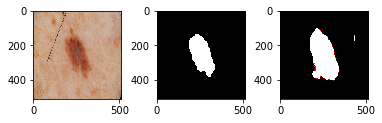

In [130]:
# run this cell several times. each time you should see a new image and its results

m = random.randint(0, len(predict_raw)-1)

img_raw=sitk.ReadImage(os.path.join(predict_path_raw,predict_raw[m]))
img_array_raw= sitk.GetArrayFromImage(img_raw)
img_array_raw=img_array_raw/255.0

testing=np.expand_dims(img_array_raw, axis=0)

img_array_mask=cv.imread(os.path.join(predict_path_mask,predict_mask[m]))
img_array_mask=img_array_mask/255.0


result= model_final.predict(testing)               # used to predict the result
result=result>0.5
predict_result =np.squeeze(result,axis=0)

fig = plt.figure()                                # plotting the results
fig.subplots_adjust(hspace=0.4, wspace=0.4)

ax = fig.add_subplot(1, 3, 1)                     # the original validation image
ax.imshow(img_array_raw)

ax = fig.add_subplot(1, 3, 2)                     # the ground truth provided
ax.imshow(img_array_mask, cmap="gray")

ax = fig.add_subplot(1, 3, 3)                     # segmentation predicted by our neural net model
ax.imshow(predict_result*255, cmap="gray")

So we plot, the original image first, then the ground truth provided, followed by the predicted segmentation in the end.

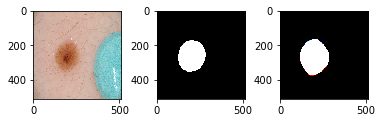

In [136]:
# run this cell several times. each time you should see a new image and its results

m = random.randint(0, len(predict_raw)-1)

img_raw=sitk.ReadImage(os.path.join(predict_path_raw,predict_raw[m]))
img_array_raw= sitk.GetArrayFromImage(img_raw)
img_array_raw=img_array_raw/255.0

testing=np.expand_dims(img_array_raw, axis=0)

img_array_mask=cv.imread(os.path.join(predict_path_mask,predict_mask[m]))
img_array_mask=img_array_mask/255.0


result= model_final.predict(testing)               # used to predict the result
result=result>0.5
predict_result =np.squeeze(result,axis=0)

fig = plt.figure()                                # plotting the results
fig.subplots_adjust(hspace=0.4, wspace=0.4)

ax = fig.add_subplot(1, 3, 1)                     # the original validation image
ax.imshow(img_array_raw)

ax = fig.add_subplot(1, 3, 2)                     # the ground truth provided
ax.imshow(img_array_mask, cmap="gray")

ax = fig.add_subplot(1, 3, 3)                     # segmentation predicted by our neural net model
ax.imshow(predict_result*255, cmap="gray")

So we plot, the original image first, then the ground truth provided, followed by the predicted segmentation in the end.

What do you observe?

The neural network works well with certain images giving a nearly perfect segmentation, considering that it has never seen these images before. With some images it is not accurate and with other images it completely fails. If we look closely, we see the network performs well with images having distinct lesions with good contrast, but fails with images having very less contrast. 

To check all the predicted results we save all the predicted segmentations in a new folder.

To do so, please make a directory first and then execute the cell below it to save all the results in the directory.

In [111]:
os.mkdir('H:/Arjun Files/Project/Lesion/Predicted_Results/') #makes directory, change the path location

In [125]:
for k in predict_raw:
    img_raw=sitk.ReadImage(os.path.join(predict_path_raw,k))
    img_array_raw= sitk.GetArrayFromImage(img_raw)
    img_array_raw=img_array_raw/255.0
    
    testing=np.expand_dims(img_array_raw, axis=0)

    result= model_final.predict(testing)
    result=result>0.5
    predict_result =np.squeeze(result,axis=0)
    predict_result = np.uint8(predict_result)
    
    predict_result = predict_result*255
    
    io.imsave('H:/Arjun Files/Project/Lesion/Predicted_Results/' + k[:-4] + '.png', predict_result)
    

C:\Users\arjun\Anaconda3\envs\tensorflowcpu\lib\site-packages\ipykernel_launcher.py:15: UserWarning: H:/Arjun Files/Project/Lesion/Predicted_Results/ISIC_0012099.png is a low contrast image
  from ipykernel import kernelapp as app
C:\Users\arjun\Anaconda3\envs\tensorflowcpu\lib\site-packages\ipykernel_launcher.py:15: UserWarning: H:/Arjun Files/Project/Lesion/Predicted_Results/ISIC_0012126.png is a low contrast image
  from ipykernel import kernelapp as app
C:\Users\arjun\Anaconda3\envs\tensorflowcpu\lib\site-packages\ipykernel_launcher.py:15: UserWarning: H:/Arjun Files/Project/Lesion/Predicted_Results/ISIC_0012210.png is a low contrast image
  from ipykernel import kernelapp as app
C:\Users\arjun\Anaconda3\envs\tensorflowcpu\lib\site-packages\ipykernel_launcher.py:15: UserWarning: H:/Arjun Files/Project/Lesion/Predicted_Results/ISIC_0012254.png is a low contrast image
  from ipykernel import kernelapp as app
C:\Users\arjun\Anaconda3\envs\tensorflowcpu\lib\site-packages\ipykernel_laun

Now if we go to the path, we can see all the predicted segmentations. 

Compare the predicted segmentation with the original ground truth provided. Remember, we have achieved an accuracy of approximately 88-89%. 

The best accuracy obtained in the ISIC 2017 challenge was around 93.4%. https://challenge.kitware.com/#phase/584b0afacad3a51cc66c8e24

So there are still lots of grounds for improvement in terms of preprocessing, changing the model and tuning hyperparameters.

#### Question : What changes would you suggest to further improve the accuracy of the neural network? 

Answer: 